In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import gmean
import scipy.stats as stats
import statsmodels.api as sm
from statistics import median, mean, stdev
import seaborn as sns
from scipy import stats 
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
import math
from scipy.stats import gmean
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller,kpss

In [2]:
#!pip uninstall pandas
#!pip install --upgrade pandas==1.2.4
#!pip install --user  pandas

In [3]:
A = pd.read_csv('C:/Users/jlouv/ABA-Spring2023/Data/Pickle Files/Processed_Dataframes/Disease_Proc_df.csv')

In [4]:
A.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
A['State'] == 'CA'

0      False
1      False
2      False
3      False
4      False
       ...  
619    False
620    False
621    False
622    False
623    False
Name: State, Length: 624, dtype: bool

In [6]:
cal1 = A[(A['State'] == 'CA')]
tex1 =  A[(A['State'] == 'TX') ]
ny1=   A[(A['State'] == 'NY')]

In [7]:
ny1.reset_index(inplace = True)
cal1.reset_index(inplace = True)
tex1.reset_index(inplace = True)

In [8]:
ny1.set_index('Year', inplace = True)
cal1.set_index('Year', inplace = True)
tex1.set_index('Year', inplace = True)

In [9]:
ny1.drop(['index', 'State',  'StateDesc'], axis = 1, inplace = True)
cal1.drop(['index', 'State',  'StateDesc'],axis = 1, inplace = True)
tex1.drop(['index', 'State',  'StateDesc'],axis = 1, inplace = True)

C:\Users\jlouv\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
cal = cal1[:-2]
tex = tex1[:-2]
ny = ny1[:-2]

In [11]:
ny

,CAN10_1,CAN11_1,CAN5_1,CAN6_1,CAN7_1,CAN8_1,CAN9_1
Year,,,,,,,
2008,11.250000,160.350000,139.800000,8.300000,45.8000,66.900000,18.600000
2009,11.300000,156.800000,140.275000,8.275000,45.1750,66.600000,18.850000
2010,11.383333,153.100000,140.750000,8.216667,44.7000,66.216667,19.000000
2011,11.475000,150.125000,141.662500,8.175000,44.2625,66.012500,19.162500
2012,11.590000,147.340000,142.300000,8.160000,43.9200,65.810000,19.260000
2013,11.810000,142.740000,143.810000,8.140000,43.2600,65.470000,19.520000
2014,12.050000,140.100000,145.440000,8.100000,42.7600,65.230000,19.660000
2015,12.300000,140.070000,147.360000,8.080000,42.3600,65.170000,19.790000
2016,12.437500,139.787500,148.100000,8.087500,42.2125,65.112500,19.825000


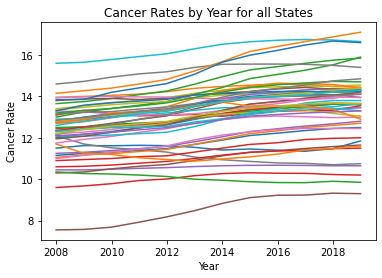

In [12]:
import matplotlib.pyplot as plt

# group the data by state
state_groups = A.groupby('State')

# plot each state's cancer rates over time
for state, group in state_groups:
    plt.plot(group['Year'], group['CAN10_1'], label=state)
    #plot_acf(group['CAN10_1'], label = state)
    #plot_pacf(group['CAN10_1'].squeeze(), lags = 5, title = state)

# add plot title and axis labels
plt.title('Cancer Rates by Year for all States')
plt.xlabel('Year')
plt.ylabel('Cancer Rate')

plt.show()

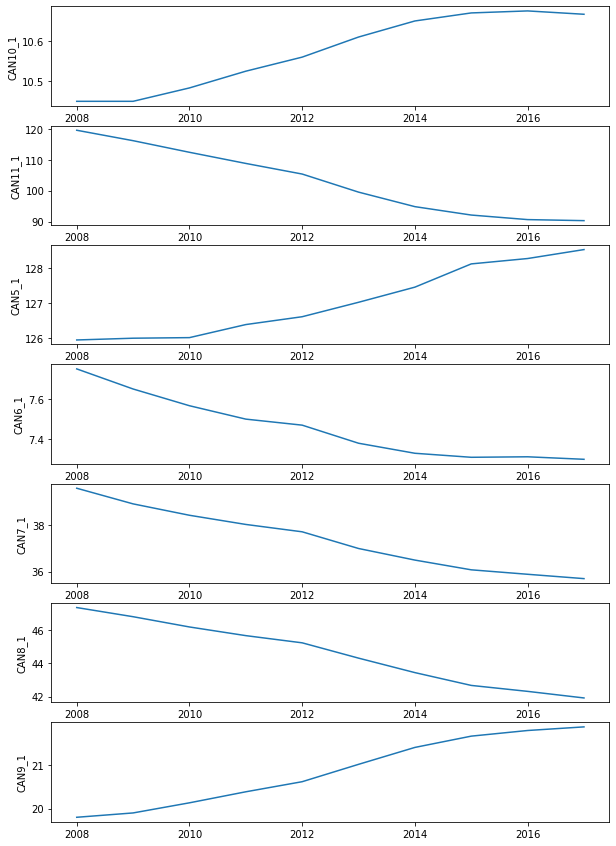

In [13]:
fig, axes = plt.subplots(7, 1, figsize=(10, 15))

axes[0].plot(cal['CAN10_1'])
axes[0].set_ylabel('CAN10_1')

axes[1].plot(cal['CAN11_1'])
axes[1].set_ylabel('CAN11_1')

axes[2].plot(cal['CAN5_1'])
axes[2].set_ylabel('CAN5_1')

axes[3].plot(cal['CAN6_1'])
axes[3].set_ylabel('CAN6_1')

axes[4].plot(cal['CAN7_1'])
axes[4].set_ylabel('CAN7_1')

axes[5].plot(cal['CAN8_1'])
axes[5].set_ylabel('CAN8_1')

axes[6].plot(cal['CAN9_1'])
axes[6].set_ylabel('CAN9_1')

plt.show()

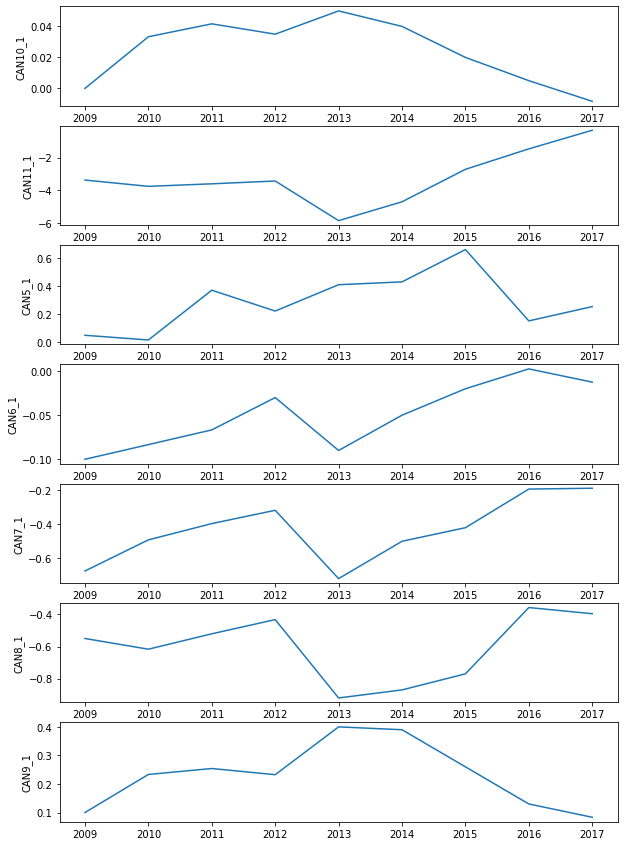

In [14]:
fig, axes = plt.subplots(7, 1, figsize=(10, 15))

axes[0].plot(cal['CAN10_1'].diff().dropna())
axes[0].set_ylabel('CAN10_1')

axes[1].plot(cal['CAN11_1'].diff().dropna())
axes[1].set_ylabel('CAN11_1')

axes[2].plot(cal['CAN5_1'].diff().dropna())
axes[2].set_ylabel('CAN5_1')

axes[3].plot(cal['CAN6_1'].diff().dropna())
axes[3].set_ylabel('CAN6_1')

axes[4].plot(cal['CAN7_1'].diff().dropna())
axes[4].set_ylabel('CAN7_1')

axes[5].plot(cal['CAN8_1'].diff().dropna())
axes[5].set_ylabel('CAN8_1')

axes[6].plot(cal['CAN9_1'].diff().dropna())
axes[6].set_ylabel('CAN9_1')

plt.show()

In [15]:
cal.columns

Index(['CAN10_1', 'CAN11_1', 'CAN5_1', 'CAN6_1', 'CAN7_1', 'CAN8_1', 'CAN9_1'], dtype='object')

In [16]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in ny.columns: 
    #print(adfuller(cal[i].diff().dropna())[1])
    adf_result = adfuller(ny[i].dropna())
    print('ADF Statistic: ', adf_result[0])
    print('p-value: ', adf_result[1])

ADF Statistic:  -0.8552244080205903
p-value:  0.8023599935966711
ADF Statistic:  -1.0156896625628244
p-value:  0.7474989309719213
ADF Statistic:  1.1929789572064875
p-value:  0.9959370136313604
ADF Statistic:  -3.2222411943407736
p-value:  0.01873283170502095
ADF Statistic:  -1.486740171310463
p-value:  0.5400602920471178
ADF Statistic:  -9.291418144833287
p-value:  1.1769808452953697e-15
ADF Statistic:  -2.5959310996247438
p-value:  0.09384114590829179


In [17]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in cal.columns: 
    kpss_result = kpss(cal[i])
    print('KPSS Statistic: ', kpss_result[0])
    print('p-value: ', kpss_result[1])

KPSS Statistic:  0.5598850895451717
p-value:  0.028179033886222588
KPSS Statistic:  0.579095849214967
p-value:  0.02453674098045754
KPSS Statistic:  0.5700571252870162
p-value:  0.025888034845266604
KPSS Statistic:  0.5668824822990817
p-value:  0.026603044527233853
KPSS Statistic:  0.58840285713545
p-value:  0.023690649351322722
KPSS Statistic:  0.5872411303826923
p-value:  0.023796260874300694
KPSS Statistic:  0.578754123061521
p-value:  0.024567806994407183


In [18]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in tex.columns: 
    kpss_result = kpss(tex[i])
    print('KPSS Statistic: ', kpss_result[0])
    print('p-value: ', kpss_result[1])

KPSS Statistic:  0.5765247978724295
p-value:  0.024770472920688225
KPSS Statistic:  0.5063704797644175
p-value:  0.04023187392693299
KPSS Statistic:  0.5143482148285082
p-value:  0.03843508675033598
KPSS Statistic:  0.3931084976890894
p-value:  0.0801256475478063
KPSS Statistic:  0.4961242393911181
p-value:  0.04253958572272115
KPSS Statistic:  0.5884555962802677
p-value:  0.023685854883612027
KPSS Statistic:  0.33284426692219
p-value:  0.1


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [19]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in ny.columns: 
    kpss_result = kpss(ny[i])
    print('KPSS Statistic: ', kpss_result[0])
    print('p-value: ', kpss_result[1])

KPSS Statistic:  0.5743058505480935
p-value:  0.02497219540471877
KPSS Statistic:  0.5501792810333087
p-value:  0.030365026794299834
KPSS Statistic:  0.5770335240792764
p-value:  0.024724225083702138
KPSS Statistic:  0.5590910092265414
p-value:  0.028357880804833008
KPSS Statistic:  0.584893492294337
p-value:  0.02400968251869664
KPSS Statistic:  0.5650967630573994
p-value:  0.027005233545630756
KPSS Statistic:  0.5857778523428786
p-value:  0.0239292861506474


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


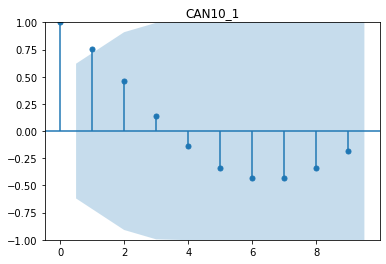

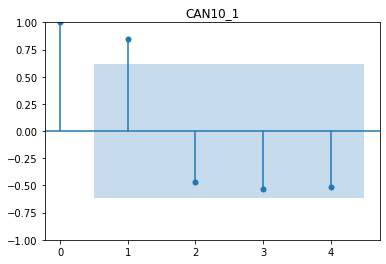

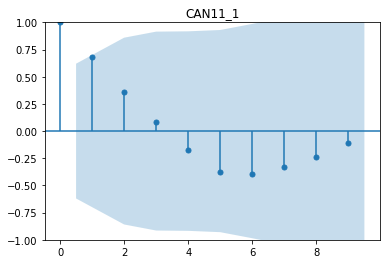

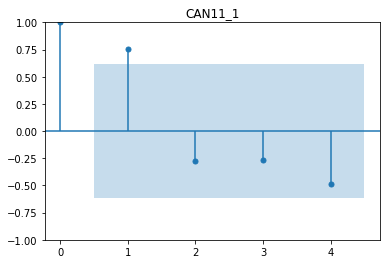

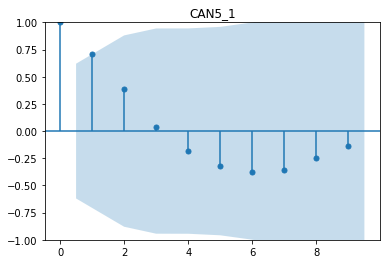

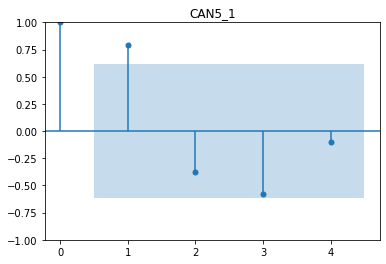

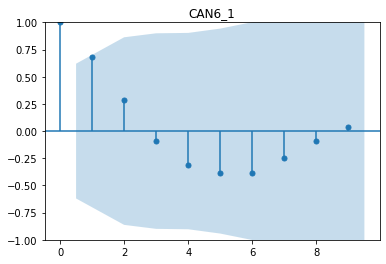

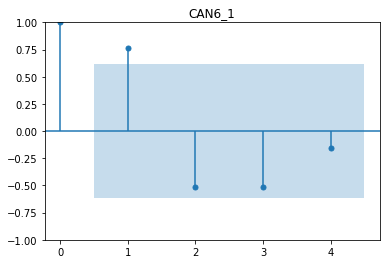

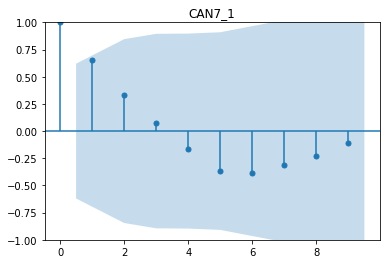

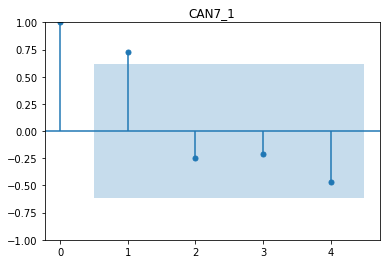

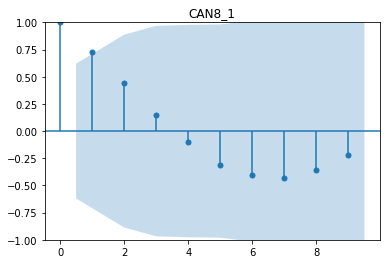

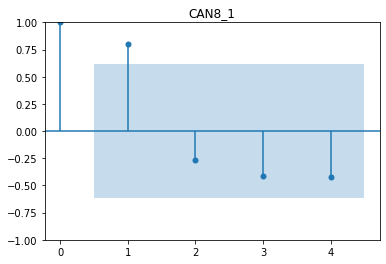

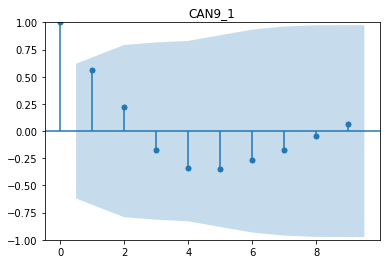

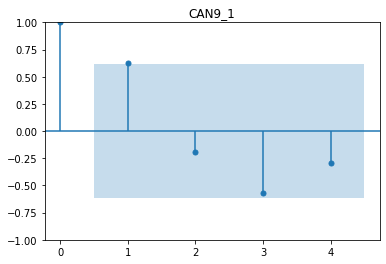

In [20]:
for i in cal.columns: 
    plot_acf(tex[i], title = i)
    plot_pacf(tex[i], lags = 4, title = i)
    plt.show()

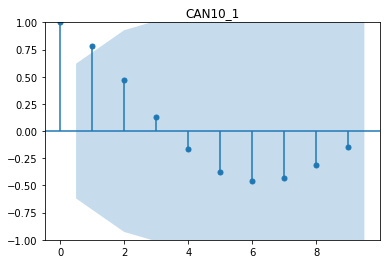

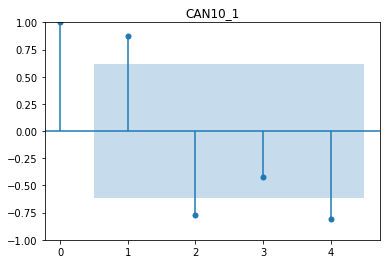

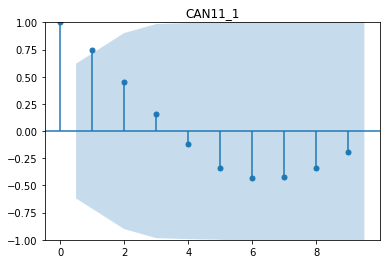

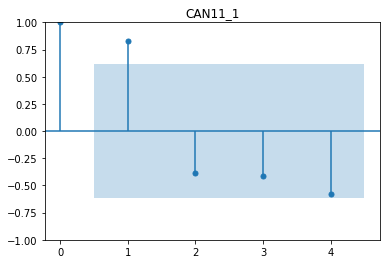

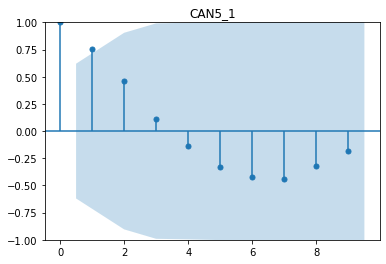

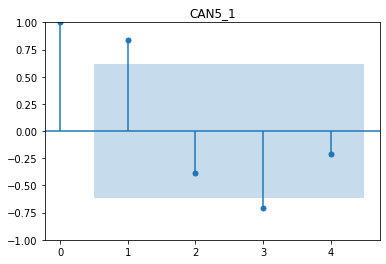

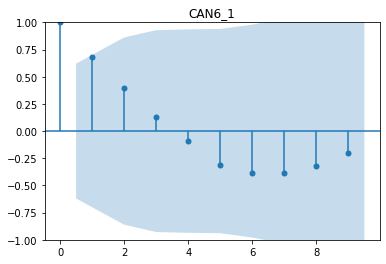

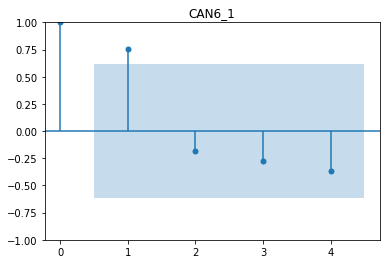

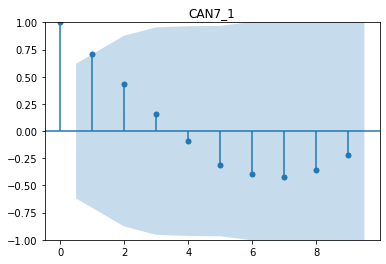

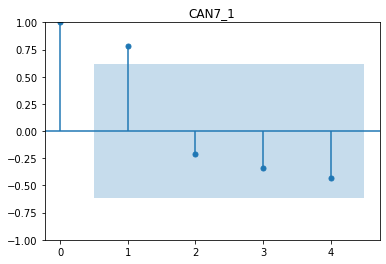

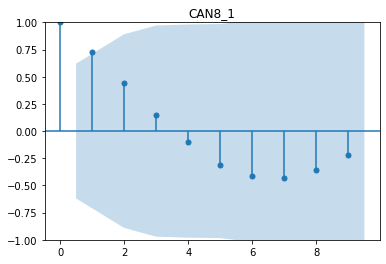

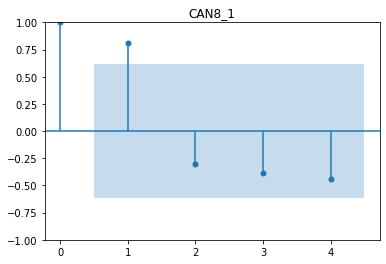

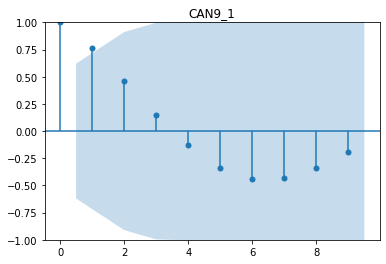

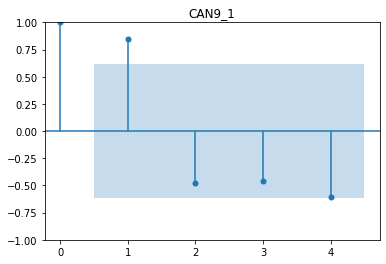

In [21]:
for i in cal.columns: 
    plot_acf(cal[i], title = i)
    plot_pacf(cal[i], lags = 4, title = i)
    plt.show()

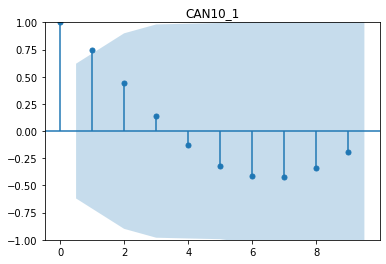

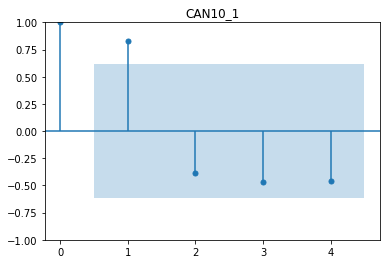

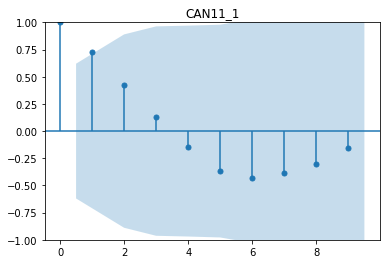

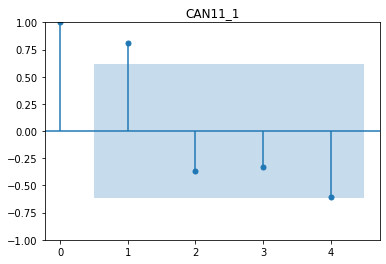

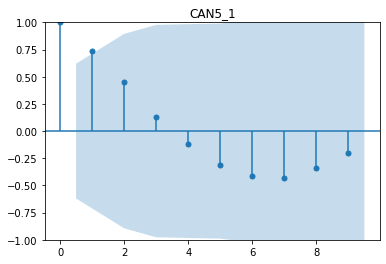

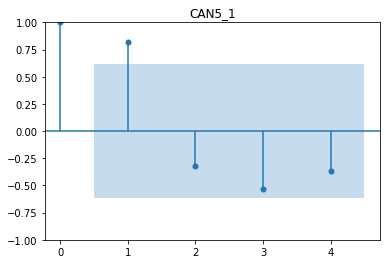

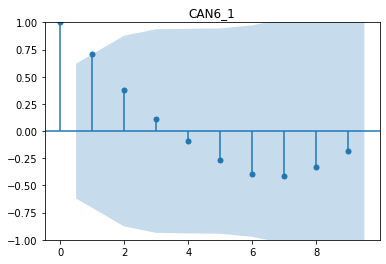

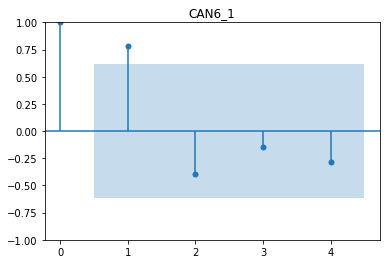

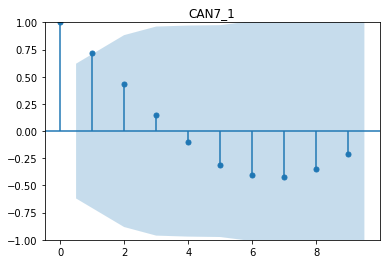

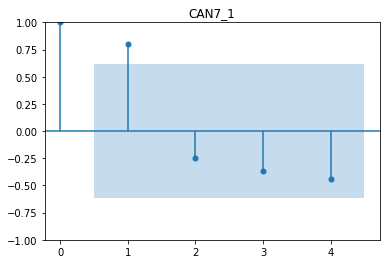

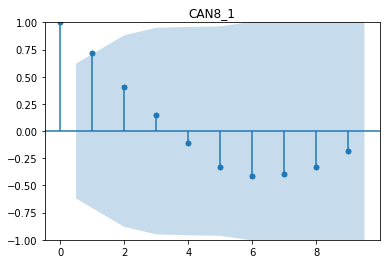

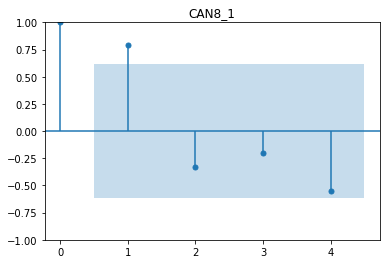

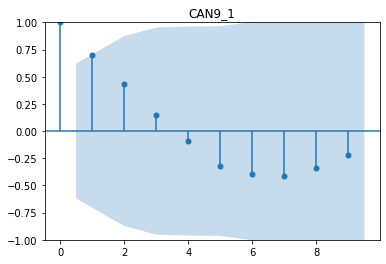

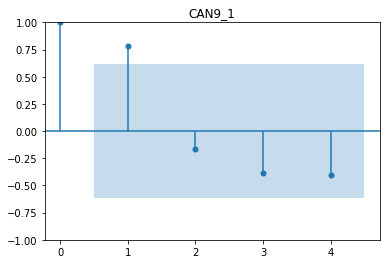

In [22]:
for i in ny.columns: 
    plot_acf(ny[i], title = i)
    plot_pacf(ny[i], lags = 4, title = i)
    plt.show()

In [23]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [28]:
for column in cal.columns:
    # Fit an ARIMA model using the auto_arima function
    model = auto_arima(cal[column], seasonal=False, suppress_warnings=True)
    print(f'Column: {column}, ARIMA Model: {model.order}')
    forecast = model.predict(n_periods=2)
    print(f"Predictions for \n{column}: {forecast}")
    # Get the MAE 
    print('MAE: ',np.sqrt(mean_absolute_error(cal1[column][-2:], forecast)))
 
    # Get the RMSE 
    print('RMSE: ',np.sqrt(mean_squared_error(cal1[column][-2:], forecast)))

    print('R squered: ',r2_score(cal1[column][-2:], forecast))

Column: CAN10_1, ARIMA Model: (2, 0, 3)
Predictions for 
CAN10_1: 10    10.652728
11    10.635533
dtype: float64
MAE:  0.09272328365669383
RMSE:  0.010409886267074774
R squered:  0.0


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN11_1, ARIMA Model: (2, 0, 0)
Predictions for 
CAN11_1: 10    91.286393
11    93.456509
dtype: float64
MAE:  1.2535751293810304
RMSE:  1.6768273023246927
R squered:  -10.246999207286025


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN5_1, ARIMA Model: (1, 0, 2)
Predictions for 
CAN5_1: 10    128.451366
11    128.539747
dtype: float64
MAE:  0.7529564858310676
RMSE:  0.616947718331005
R squered:  -3.604908729271509


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN6_1, ARIMA Model: (2, 0, 1)
Predictions for 
CAN6_1: 10    7.289848
11    7.280078
dtype: float64
MAE:  0.12262673216938398
RMSE:  0.01581084421805182
R squered:  0.0


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN7_1, ARIMA Model: (2, 0, 0)
Predictions for 
CAN7_1: 10    35.637549
11    35.691472
dtype: float64
MAE:  0.4631526254518651
RMSE:  0.24926663200457494
R squered:  -5.2133853830906824


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN8_1, ARIMA Model: (2, 0, 0)
Predictions for 
CAN8_1: 10    41.700348
11    41.661001
dtype: float64
MAE:  0.6169881742296054
RMSE:  0.4212250682942681
R squered:  -3.4357639539878013


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN9_1, ARIMA Model: (2, 0, 1)
Predictions for 
CAN9_1: 10    21.859794
11    21.734583
dtype: float64
MAE:  0.33957581380950563
RMSE:  0.1257274062404924
R squered:  -100.16723635173828


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [30]:
cal1

,CAN10_1,CAN11_1,CAN5_1,CAN6_1,CAN7_1,CAN8_1,CAN9_1
Year,,,,,,,
2008,10.450000,119.550000,125.950000,7.750000,39.600000,47.350000,19.800000
2009,10.450000,116.175000,126.000000,7.650000,38.925000,46.800000,19.900000
2010,10.483333,112.416667,126.016667,7.566667,38.433333,46.183333,20.133333
2011,10.525000,108.812500,126.387500,7.500000,38.037500,45.662500,20.387500
2012,10.560000,105.380000,126.610000,7.470000,37.720000,45.230000,20.620000
2013,10.610000,99.530000,127.020000,7.380000,37.000000,44.310000,21.020000
2014,10.650000,94.830000,127.450000,7.330000,36.500000,43.440000,21.410000
2015,10.670000,92.110000,128.110000,7.310000,36.080000,42.670000,21.670000
2016,10.675000,90.637500,128.262500,7.312500,35.887500,42.312500,21.800000


In [25]:
for column in tex.columns:
    # Fit an ARIMA model using the auto_arima function
    model = auto_arima(tex[column], seasonal=False, error_action="ignore")
    print(f'Column: {column}, ARIMA Model: {model.order}')
    forecast = model.predict(n_periods=2)
    print(f"Predictions for {column}: {forecast}")
    tex1[column][-2:]
    # Get the MAE 
    print('MAE: ',np.sqrt(mean_absolute_error(tex1[column][-2:], forecast)))
 
    # Get the RMSE 
    print('RMSE: ',np.sqrt(mean_squared_error(tex1[column][-2:], forecast)))

    print('R squered: ',r2_score(tex1[column][-2:], forecast))

Column: CAN10_1, ARIMA Model: (1, 0, 3)
Predictions for CAN10_1: 10    11.472106
11    11.515854
dtype: float64
MAE:  0.09681875053667946
RMSE:  0.01139559020236775
R squered:  0.16889935321410454


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN11_1, ARIMA Model: (1, 0, 2)
Predictions for CAN11_1: 10     99.903844
11    100.301697
dtype: float64
MAE:  0.9537974238730791
RMSE:  1.111478454533903
R squered:  -0.7612964738952321


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN5_1, ARIMA Model: (1, 0, 2)
Predictions for CAN5_1: 10    118.475460
11    118.595872
dtype: float64
MAE:  1.1244258788945578
RMSE:  1.355889951270234
R squered:  -5.07747953704336


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN6_1, ARIMA Model: (1, 0, 2)
Predictions for CAN6_1: 10    9.300469
11    9.298649
dtype: float64
MAE:  0.19478412023787472
RMSE:  0.04024099171598259
R squered:  -9.363759451428693


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN7_1, ARIMA Model: (1, 0, 3)
Predictions for CAN7_1: 10    37.945696
11    37.979645
dtype: float64
MAE:  0.3159574497444136
RMSE:  0.10191735978568026
R squered:  -6.386416516041249


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN8_1, ARIMA Model: (2, 0, 1)
Predictions for CAN8_1: 10    49.015520
11    49.098329
dtype: float64
MAE:  0.7870353034347819
RMSE:  0.7013309162508111
R squered:  -4.950730333026206


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN9_1, ARIMA Model: (0, 0, 2)
Predictions for CAN9_1: 10    13.491214
11    13.386739
dtype: float64
MAE:  0.6789871810715123
RMSE:  0.5034309632958016
R squered:  -10.264121546886114


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [29]:
for column in ny.columns:
    # Fit an ARIMA model using the auto_arima function
    model = auto_arima(ny[column], seasonal=False, suppress_warnings=True)
    print(f'Column: {column}, ARIMA Model: {model.order}')
    forecast = model.predict(n_periods=2)
    print(f"Predictions for {column}: {forecast}")
    # Get the MAE 
    print('MAE: ',np.sqrt(mean_absolute_error(ny1[column][-2:], forecast)))
 
    # Get the RMSE 
    print('RMSE: ',np.sqrt(mean_squared_error(ny1[column][-2:], forecast)))

    print('R squered: ',r2_score(ny1[column][-2:], forecast))

Column: CAN10_1, ARIMA Model: (1, 0, 3)
Predictions for CAN10_1: 10    12.649692
11    12.703183
dtype: float64
MAE:  0.24710747550630666
RMSE:  0.07075987462342125
R squered:  -0.28178172332090745


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN11_1, ARIMA Model: (2, 0, 2)
Predictions for CAN11_1: 10    143.160499
11    144.085706
dtype: float64
MAE:  0.955194698524989
RMSE:  1.066329697510707
R squered:  0.39858035105149037


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN5_1, ARIMA Model: (3, 0, 1)
Predictions for CAN5_1: 10    149.239539
11    149.292007
dtype: float64
MAE:  1.1975920513668123
RMSE:  1.544737472915264
R squered:  -5.628371833968247


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN6_1, ARIMA Model: (2, 0, 3)
Predictions for CAN6_1: 10    8.055869
11    8.033384
dtype: float64
MAE:  0.17923856090445192
RMSE:  0.032151050407502595
R squered:  -5.615616270756757


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN7_1, ARIMA Model: (2, 0, 1)
Predictions for CAN7_1: 10    42.128865
11    42.284110
dtype: float64
MAE:  0.6176469189075227
RMSE:  0.4108849846025292
R squered:  -29.013594768324236


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN8_1, ARIMA Model: (2, 0, 1)
Predictions for CAN8_1: 10    65.361115
11    65.627020
dtype: float64
MAE:  0.5971327788875652
RMSE:  0.37636311705299746
R squered:  -905.5548536178168


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Column: CAN9_1, ARIMA Model: (2, 0, 3)
Predictions for CAN9_1: 10    19.819416
11    19.810916
dtype: float64
MAE:  0.3119838394714672
RMSE:  0.10591011744905358
R squered:  -6.976499895517493


C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 R-squared score to take a negative value if the model performs worse than a horizontal line (i.e., a model that simply predicts the mean value of the outcome variable for all observations). This can happen if the model is overfitting to noise in the data, or if the data is inherently noisy or unpredictable. In such cases, the negative R-squared score indicates that the model is not useful for predicting the outcome variable

Simple Exponential smoothing

In [36]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [38]:
# Loop over each column in the DataFrame
for column in cal.columns:
    # Get the time series data for the column
    ts = cal[column]
    
    # Find the optimal alpha value
    mse_list = []
    for alpha in range(1, 10):
        alpha_value = alpha/10.0
        model = SimpleExpSmoothing(ts).fit(smoothing_level=alpha_value)
        y_pred = model.forecast(steps=2)
        mse = mean_squared_error(cal1[column][-2:], y_pred)
        mse_list.append(mse)
    optimal_alpha = (mse_list.index(min(mse_list)) + 1)/10.0
    
    # Perform simple exponential smoothing with the optimal alpha value
    model = SimpleExpSmoothing(ts).fit(smoothing_level=optimal_alpha)
    y_pred = model.forecast(steps=2)
    mse = mean_squared_error(cal1[column][-2:], y_pred)
    Rsquared = r2_score(cal1[column][-2:], forecast)
    
    # Print the forecast and mean squared error for the column
    print(f"Column: {column}")
    print(f"Optimal alpha: {optimal_alpha}")
    print(f"Forecast: {y_pred}")
    print(f"Mean squared error: {mse}")
    print(f"R squared: {Rsquared}")

Column: CAN10_1
Optimal alpha: 0.4
Forecast: 10    10.653308
11    10.653308
dtype: float64
Mean squared error: 1.0939765562838083e-05
R squared: 0.0
Column: CAN11_1
Optimal alpha: 0.7
Forecast: 10    90.663095
11    90.663095
dtype: float64
Mean squared error: 0.2687429201560904
R squared: -20155.403656594368
Column: CAN5_1
Optimal alpha: 0.9
Forecast: 10    128.489018
11    128.489018
dtype: float64
Mean squared error: 0.41153826700110085
R squared: -144392.98213482636
Column: CAN6_1
Optimal alpha: 0.9
Forecast: 10    7.301251
11    7.301251
dtype: float64
Mean squared error: 1.56484487636515e-06
R squared: 0.0
Column: CAN7_1
Optimal alpha: 0.9
Forecast: 10    35.721153
11    35.721153
dtype: float64
Mean squared error: 0.08352371224127106
R squared: -24444.719964797638
Column: CAN8_1
Optimal alpha: 0.9
Forecast: 10    41.960692
11    41.960692
dtype: float64
Mean squared error: 0.4765135109446838
R squared: -11539.910161700482
Column: CAN9_1
Optimal alpha: 0.9
Forecast: 10    21.873

In [39]:
# Loop over each column in the DataFrame
for column in tex.columns:
    # Get the time series data for the column
    ts = tex[column]
    
    # Find the optimal alpha value
    mse_list = []
    for alpha in range(1, 10):
        alpha_value = alpha/10.0
        model = SimpleExpSmoothing(ts).fit(smoothing_level=alpha_value)
        y_pred = model.forecast(steps=2)
        mse = mean_squared_error(tex1[column][-2:], y_pred)
        mse_list.append(mse)
    optimal_alpha = (mse_list.index(min(mse_list)) + 1)/10.0
    
    # Perform simple exponential smoothing with the optimal alpha value
    model = SimpleExpSmoothing(ts).fit(smoothing_level=optimal_alpha)
    y_pred = model.forecast(steps=2)
    mse = mean_squared_error(tex1[column][-2:], y_pred)
    Rsquared = r2_score(tex1[column][-2:], forecast)
    
    # Print the forecast and mean squared error for the column
    print(f"Column: {column}")
    print(f"Optimal alpha: {optimal_alpha}")
    print(f"Forecast: {y_pred}")
    print(f"Mean squared error: {mse}")
    print(f"R squared: {Rsquared}")

Column: CAN10_1
Optimal alpha: 0.9
Forecast: 10    11.410468
11    11.410468
dtype: float64
Mean squared error: 0.006090255251211362
R squared: -443840.93899060495
Column: CAN11_1
Optimal alpha: 0.1
Forecast: 10    100.658095
11    100.658095
dtype: float64
Mean squared error: 0.8270090073894423
R squared: -9399.708331482318
Column: CAN5_1
Optimal alpha: 0.9
Forecast: 10    118.350863
11    118.350863
dtype: float64
Mean squared error: 2.402497312955511
R squared: -33047.840351342486
Column: CAN6_1
Optimal alpha: 0.9
Forecast: 10    9.298543
11    9.298543
dtype: float64
Mean squared error: 0.0016738983924702055
R squared: -702602.3096197634
Column: CAN7_1
Optimal alpha: 0.1
Forecast: 10    38.029582
11    38.029582
dtype: float64
Mean squared error: 0.0024898669495642335
R squared: -236775.48932058242
Column: CAN8_1
Optimal alpha: 0.9
Forecast: 10    49.216455
11    49.216455
dtype: float64
Mean squared error: 0.6894270598325762
R squared: -9911.356650244481
Column: CAN9_1
Optimal alp

In [40]:
# Loop over each column in the DataFrame
for column in ny.columns:
    # Get the time series data for the column
    ts = ny[column]
    
    # Find the optimal alpha value
    mse_list = []
    for alpha in range(1, 10):
        alpha_value = alpha/10.0
        model = SimpleExpSmoothing(ts).fit(smoothing_level=alpha_value)
        y_pred = model.forecast(steps=2)
        mse = mean_squared_error(ny1[column][-2:], y_pred)
        mse_list.append(mse)
    optimal_alpha = (mse_list.index(min(mse_list)) + 1)/10.0
    
    # Perform simple exponential smoothing with the optimal alpha value
    model = SimpleExpSmoothing(ts).fit(smoothing_level=optimal_alpha)
    y_pred = model.forecast(steps=2)
    mse = mean_squared_error(ny1[column][-2:], y_pred)
    Rsquared = r2_score(ny1[column][-2:], forecast)
    
    # Print the forecast and mean squared error for the column
    print(f"Column: {column}")
    print(f"Optimal alpha: {optimal_alpha}")
    print(f"Forecast: {y_pred}")
    print(f"Mean squared error: {mse}")
    print(f"R squared: {Rsquared}")

Column: CAN10_1
Optimal alpha: 0.9
Forecast: 10    12.552099
11    12.552099
dtype: float64
Mean squared error: 0.03827990133007508
R squared: -12824.040065695186
Column: CAN11_1
Optimal alpha: 0.2
Forecast: 10    144.230207
11    144.230207
dtype: float64
Mean squared error: 1.8936728247376307
R squared: -8180.035700985528
Column: CAN5_1
Optimal alpha: 0.9
Forecast: 10    149.065501
11    149.065501
dtype: float64
Mean squared error: 3.031586438248183
R squared: -47585.680186927966
Column: CAN6_1
Optimal alpha: 0.9
Forecast: 10    8.083699
11    8.083699
dtype: float64
Mean squared error: 0.005225578896524108
R squared: -891538.1664056983
Column: CAN7_1
Optimal alpha: 0.9
Forecast: 10    42.113182
11    42.113182
dtype: float64
Mean squared error: 0.08867386029304794
R squared: -86121.27459159016
Column: CAN8_1
Optimal alpha: 0.8
Forecast: 10    65.14579
11    65.14579
dtype: float64
Mean squared error: 0.0002249658158751231
R squared: -13146330.0858429
Column: CAN9_1
Optimal alpha: 0

C:\Users\jlouv\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


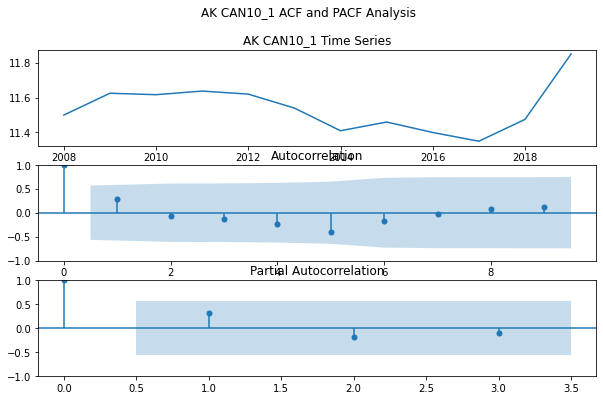

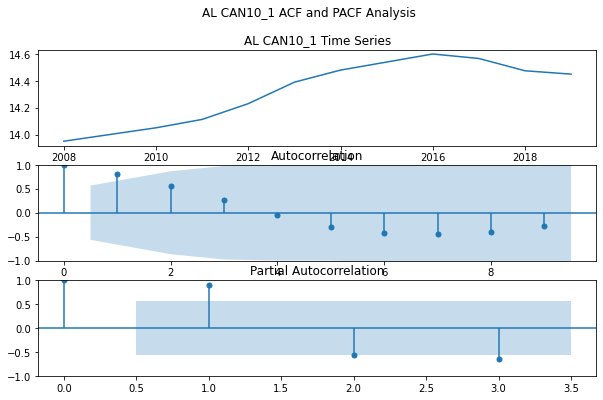

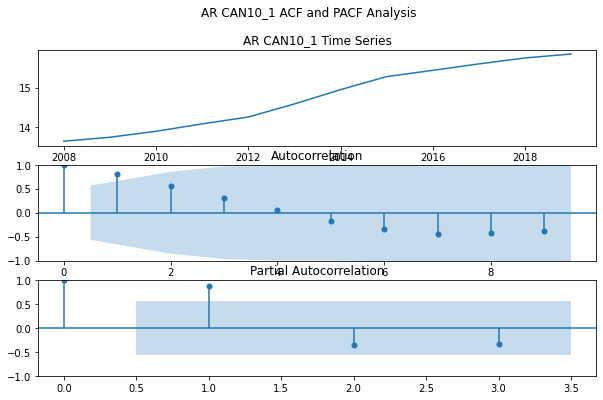

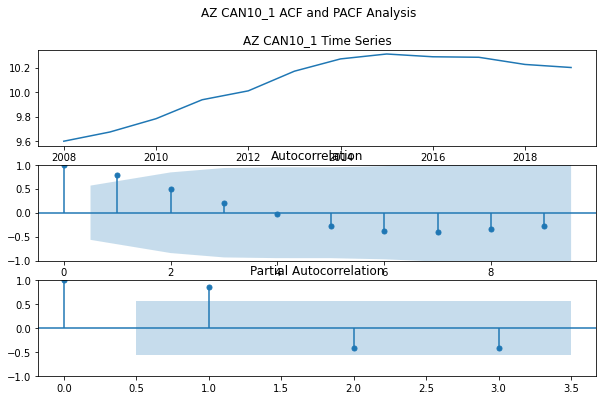

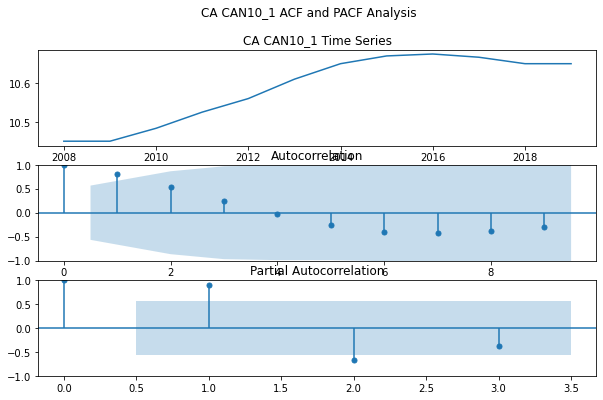

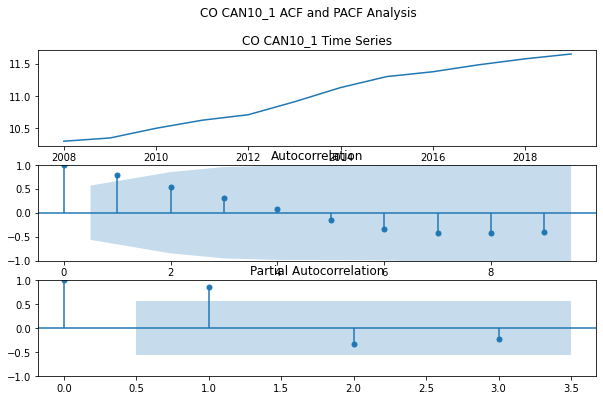

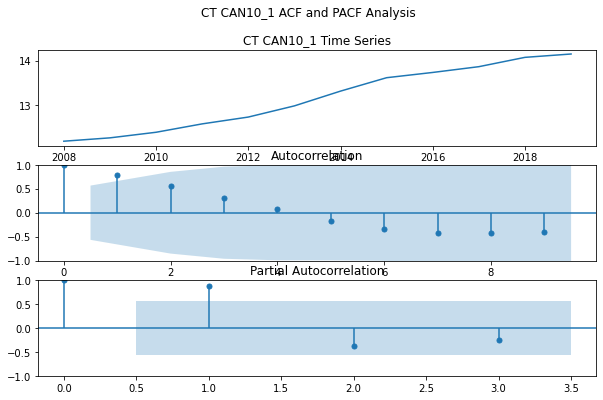

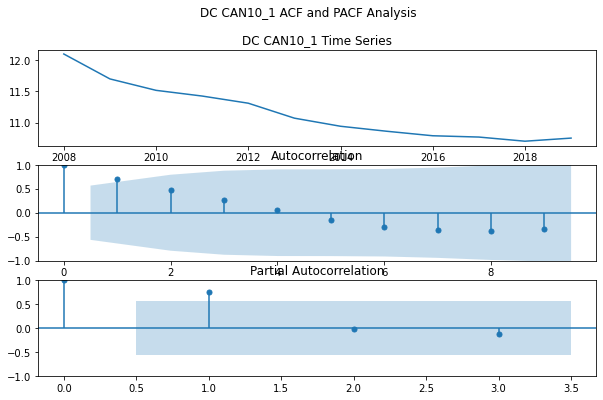

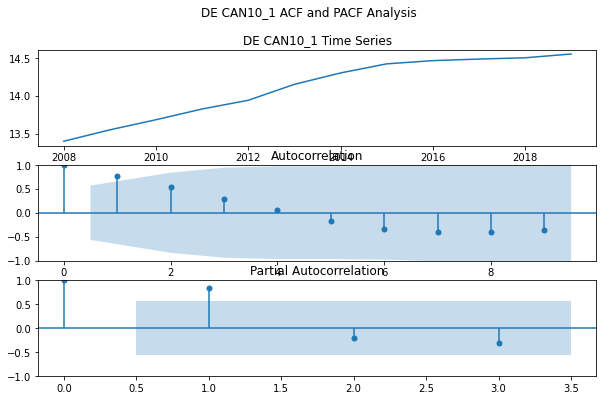

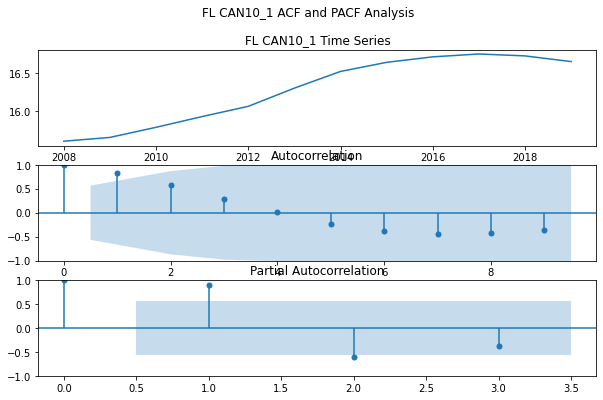

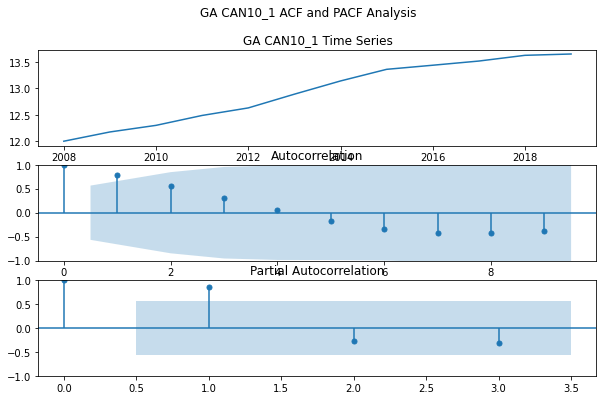

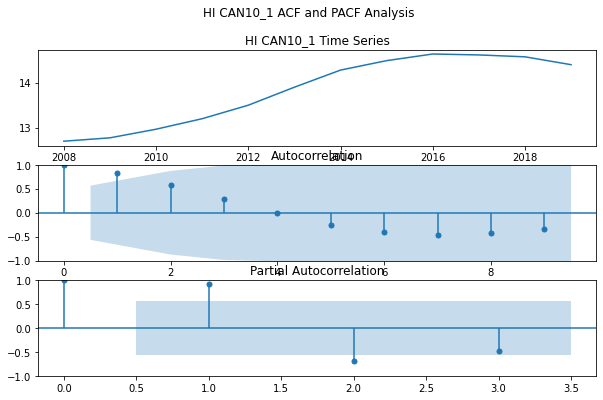

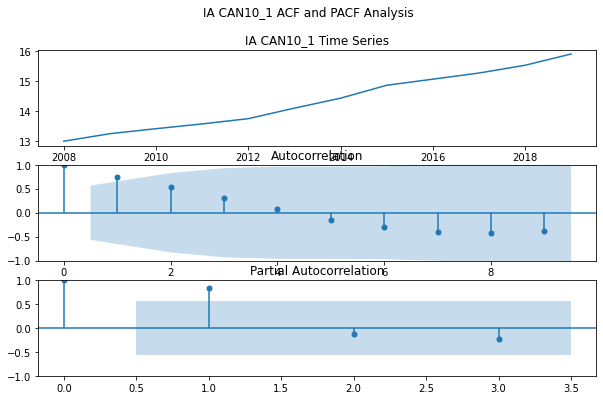

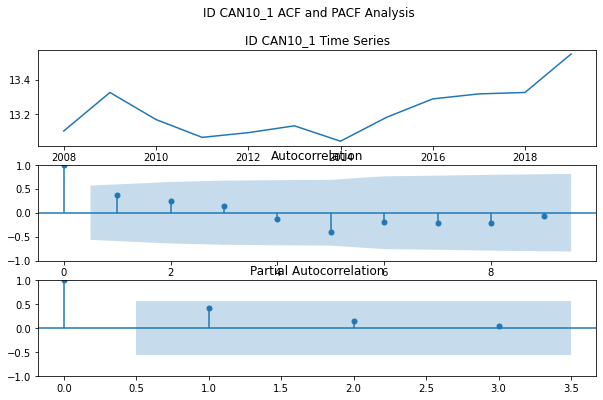

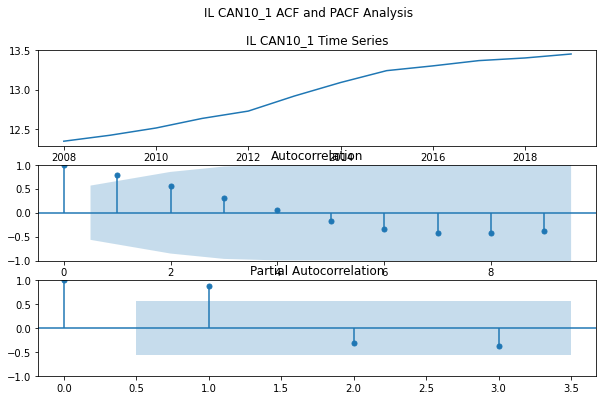

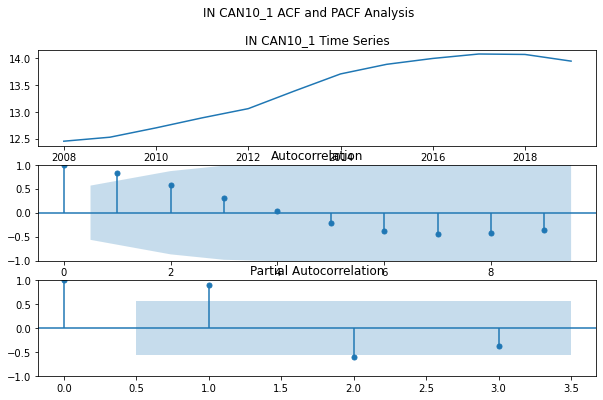

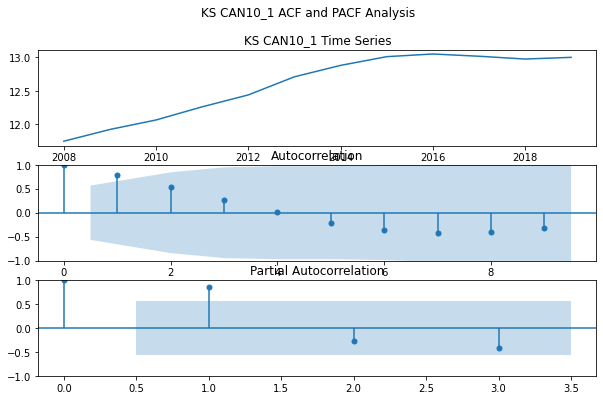

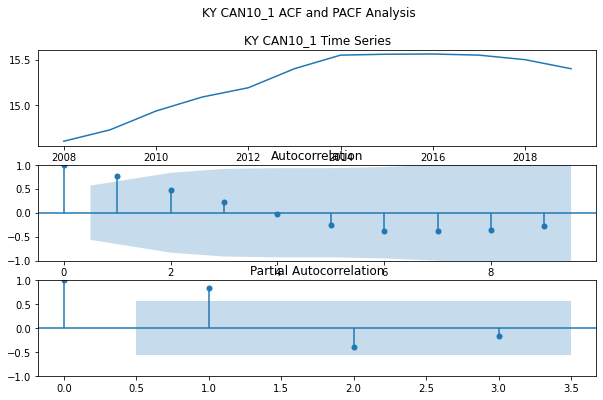

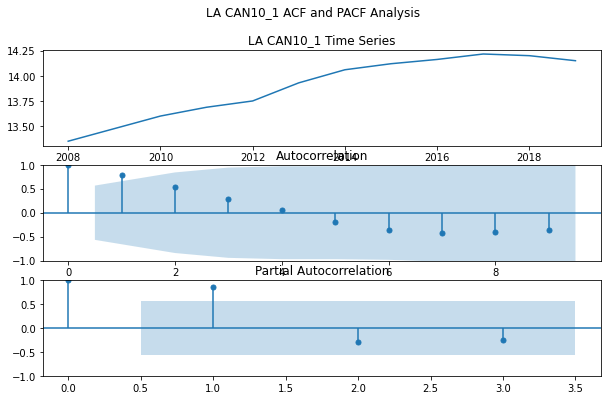

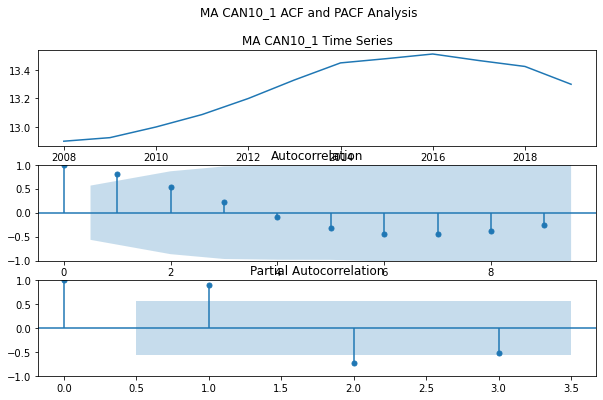

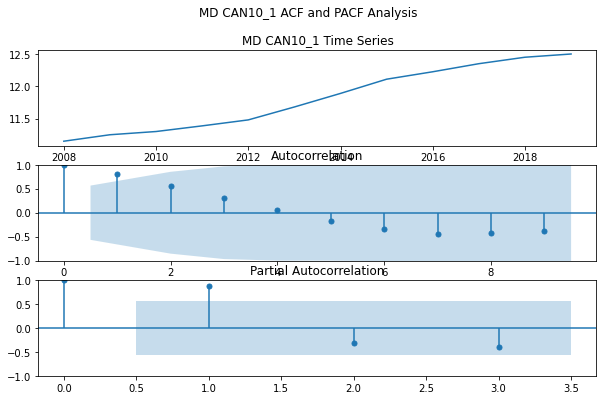

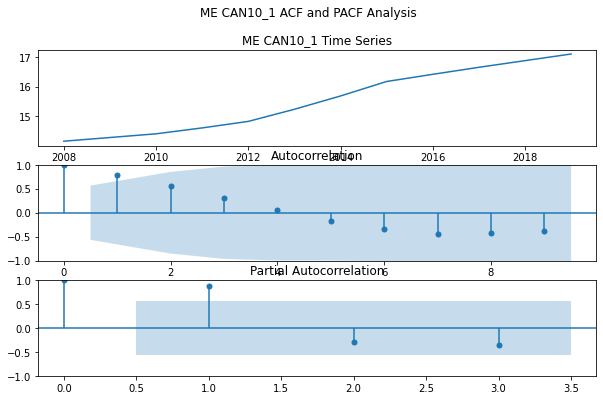

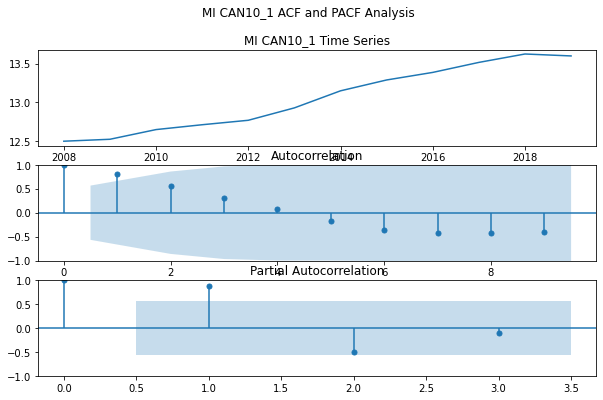

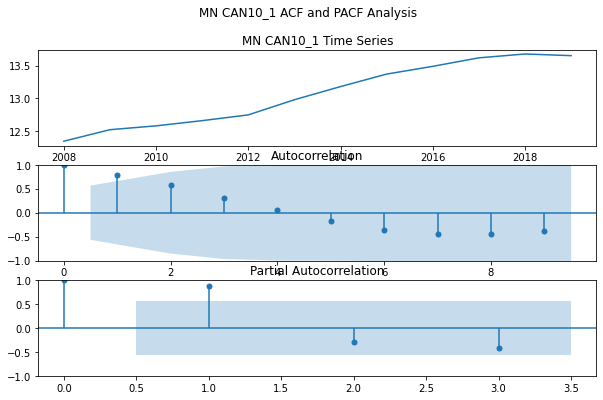

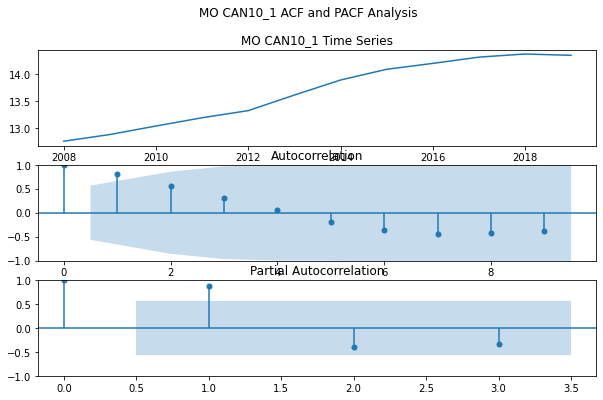

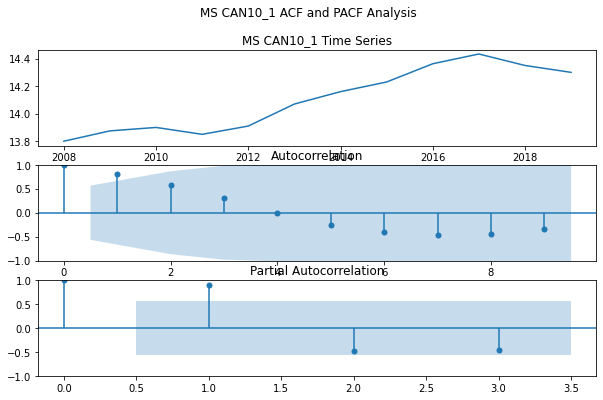

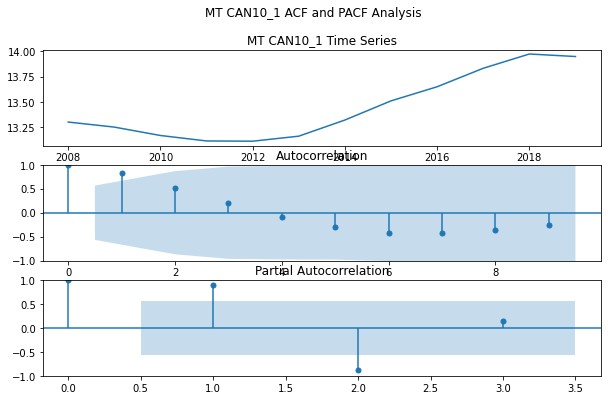

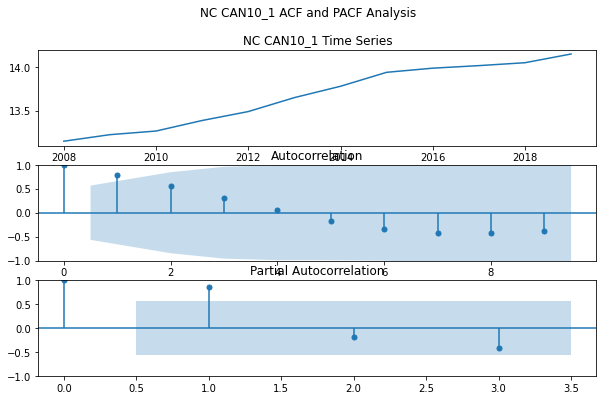

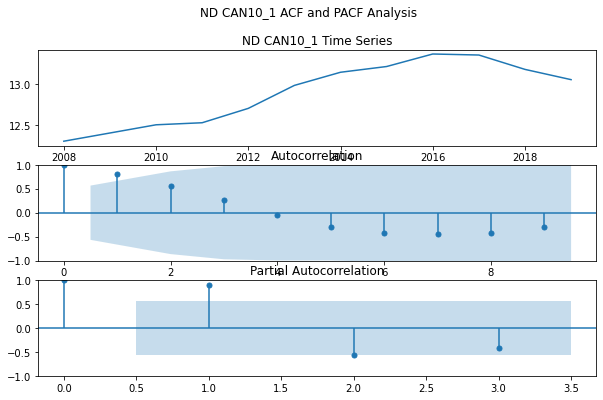

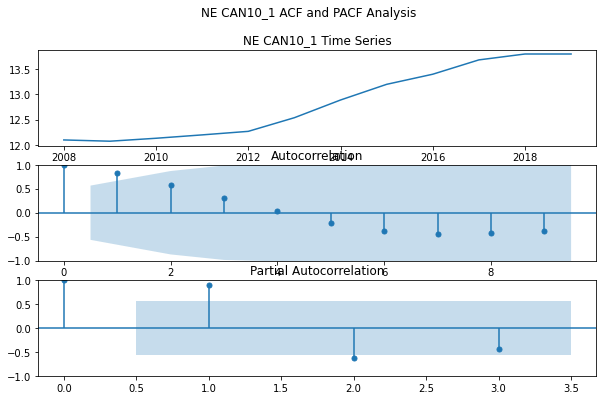

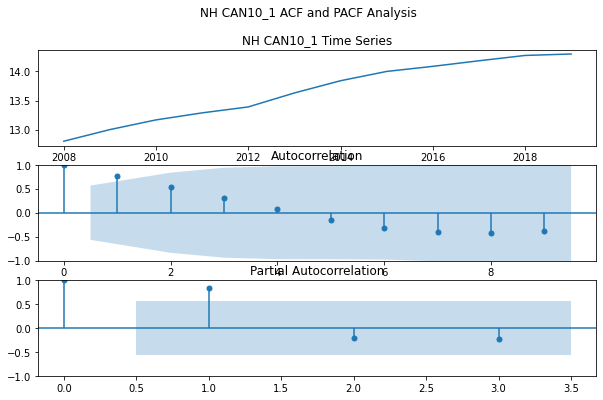

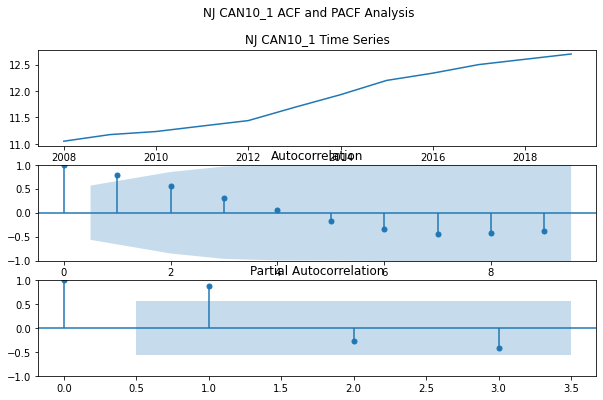

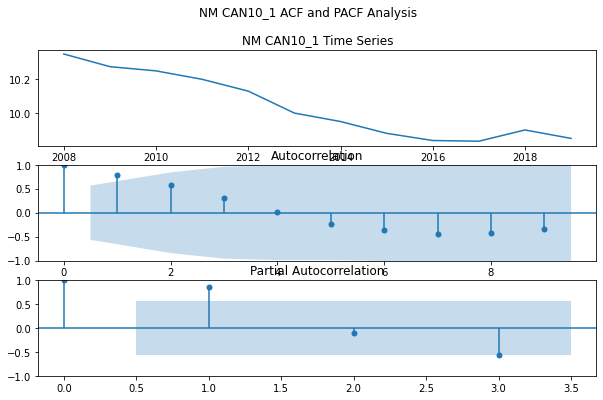

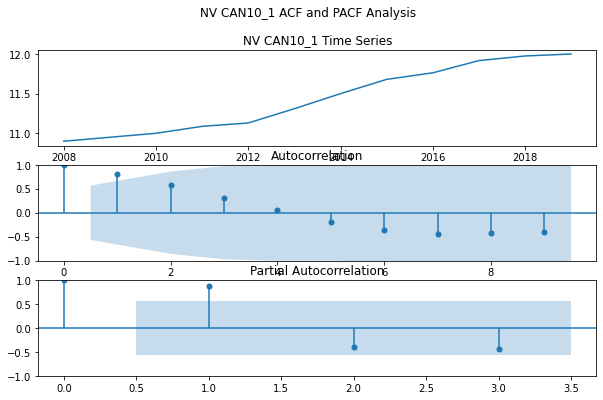

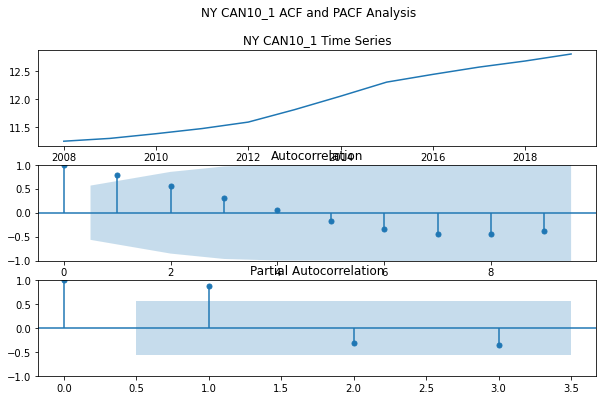

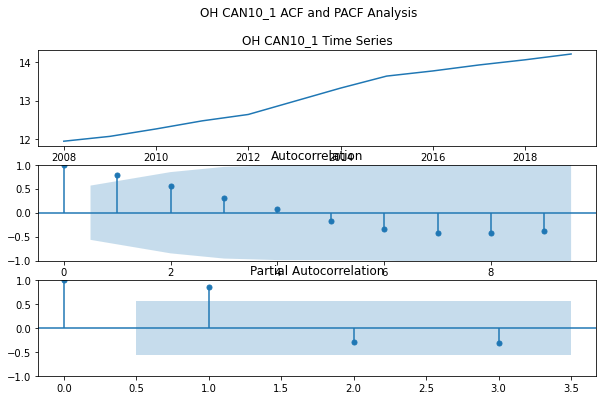

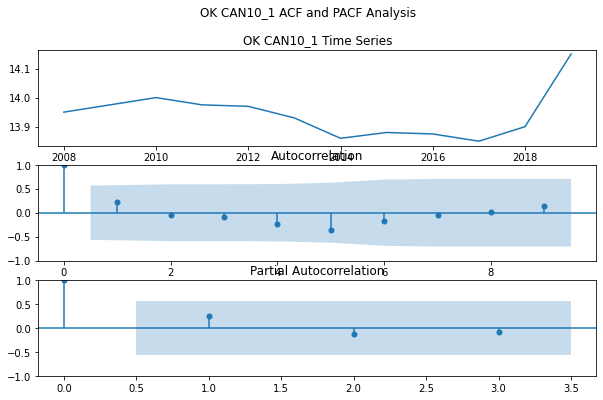

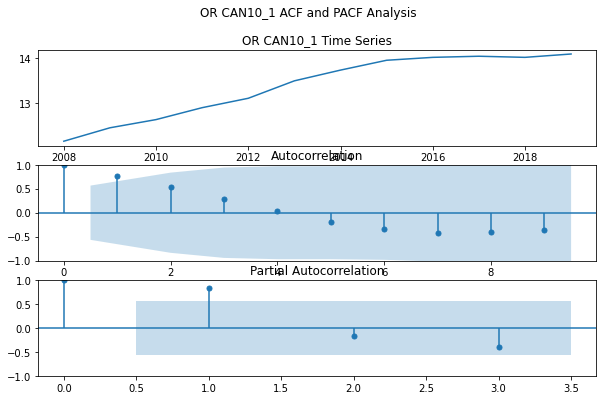

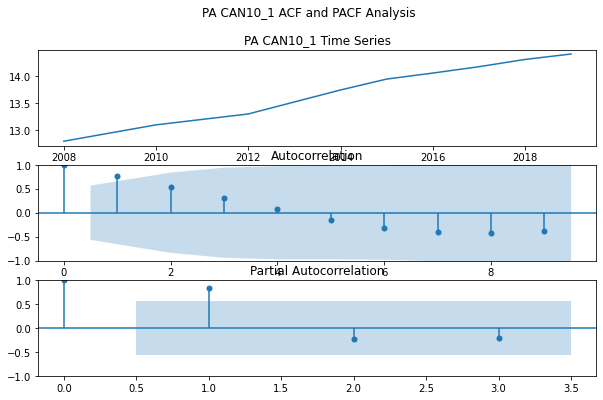

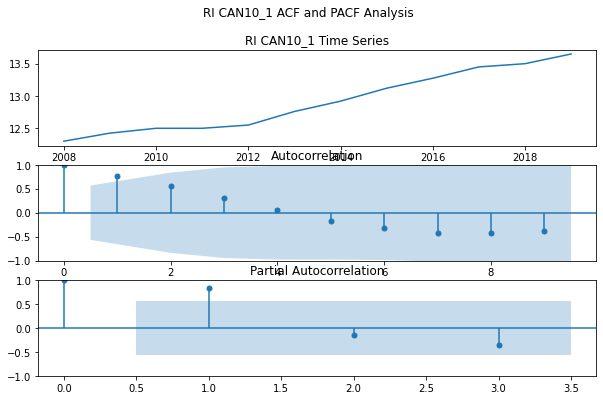

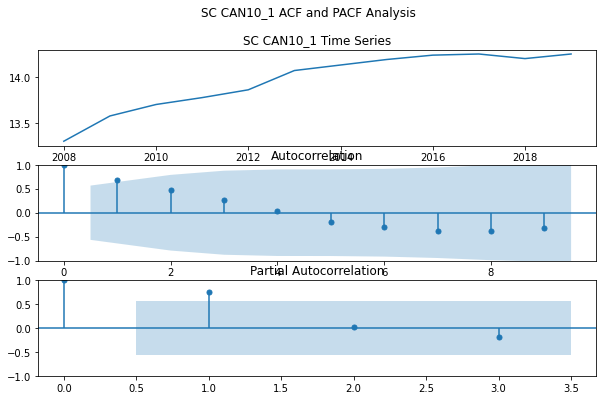

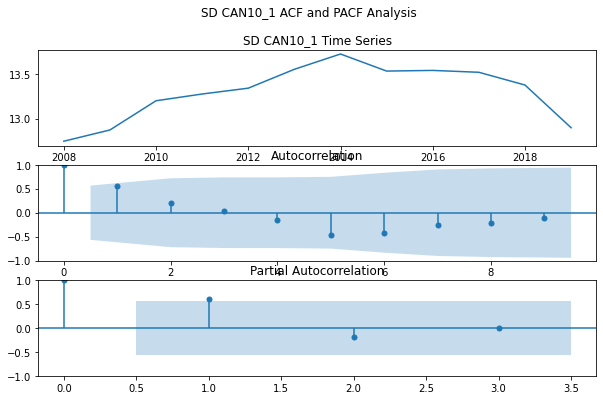

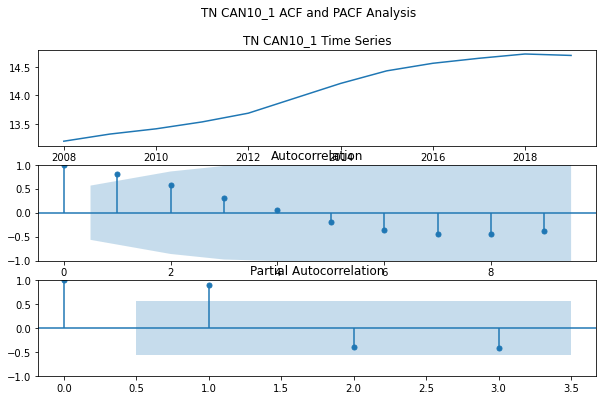

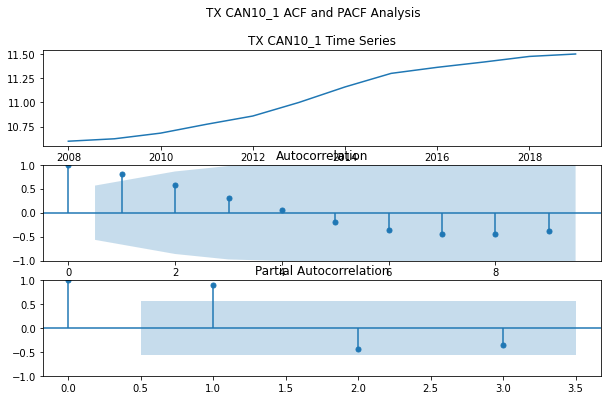

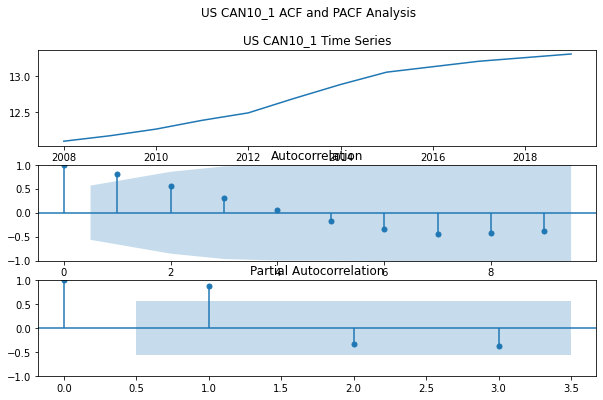

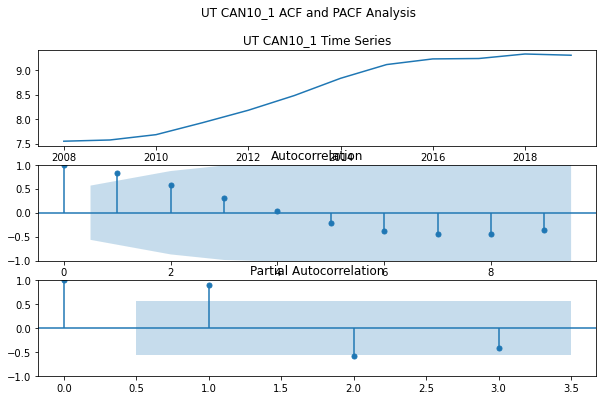

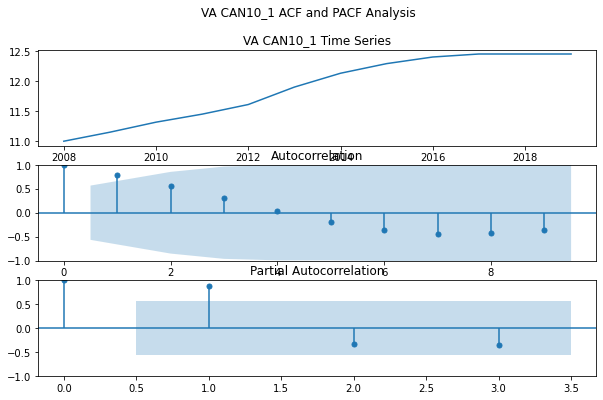

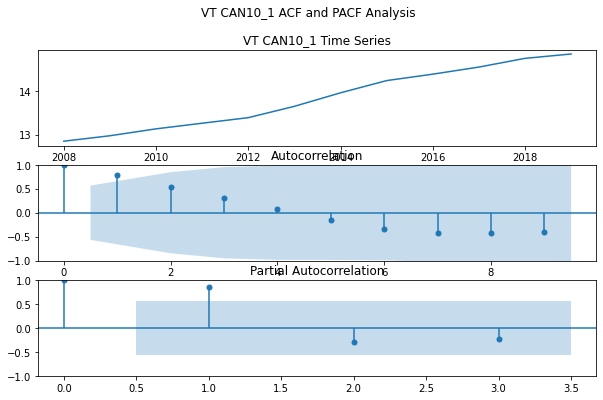

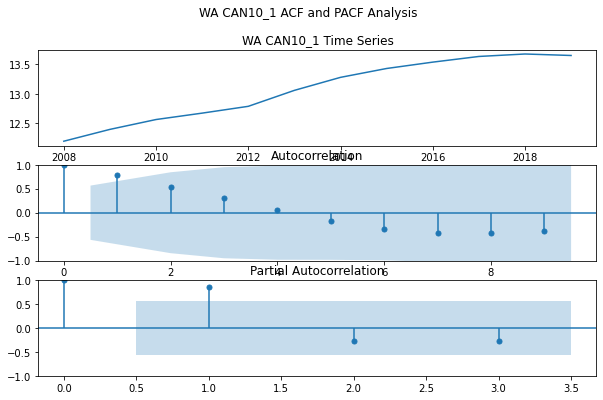

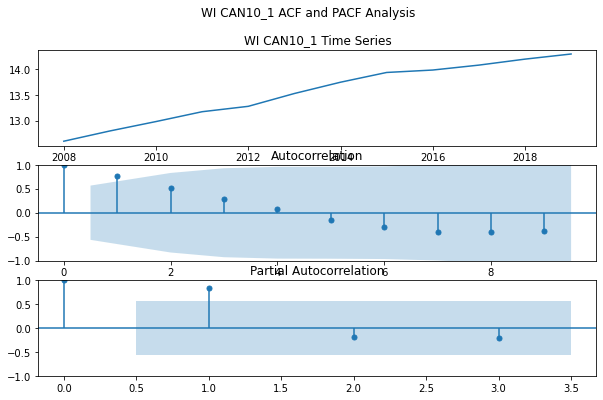

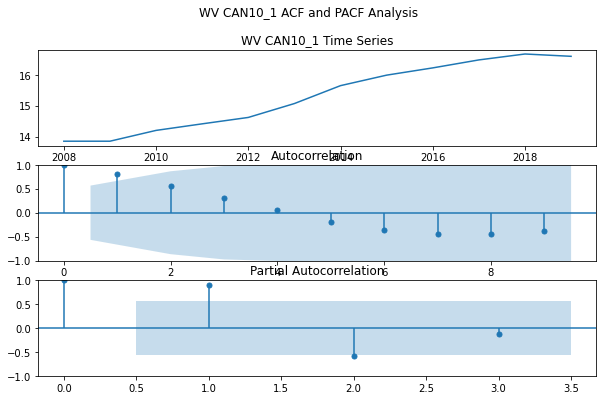

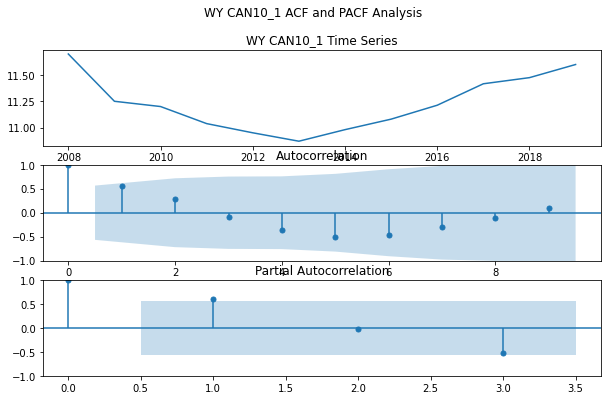

In [27]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Pivot the dataframe to have 'Year' as columns and 'State' as rows
df_pivot = A.pivot(index='State', columns='Year', values='CAN10_1')

# Loop over each state
for state in df_pivot.index:
    # Get the time series for the state
    ts = df_pivot.loc[state].dropna()
    # Perform ACF and PACF analysis
    fig, axes = plt.subplots(3, 1, figsize=(10, 6))
    ts.plot(ax=axes[0])
    axes[0].set_title(f"{state} CAN10_1 Time Series")
    sm.graphics.tsa.plot_acf(ts, lags=9, ax=axes[1])
    sm.graphics.tsa.plot_pacf(ts, lags=3, ax=axes[2])
    fig.suptitle(f"{state} CAN10_1 ACF and PACF Analysis")
    plt.show()
